In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(pd.__version__)
print(sns.__version__)
print(np.__version__)

1.5.2
0.12.1
1.23.5


In [2]:
trdf=pd.read_csv('./dataframes/train.csv')
tedf=pd.read_csv('./dataframes/test.csv')
print(trdf.shape,tedf.shape)

(891, 12) (418, 11)


In [3]:
combine=[trdf,tedf]

In [4]:
trdf[trdf['Embarked'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [5]:
trdf[['Embarked','Survived']].groupby(['Embarked']).count()

,Survived
Embarked,
C,168
Q,77
S,644


In [6]:
trdf[['Embarked','Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [7]:
trdf[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [8]:
pd.crosstab(trdf['Pclass'],trdf['Survived']).groupby(trdf['Embarked'])

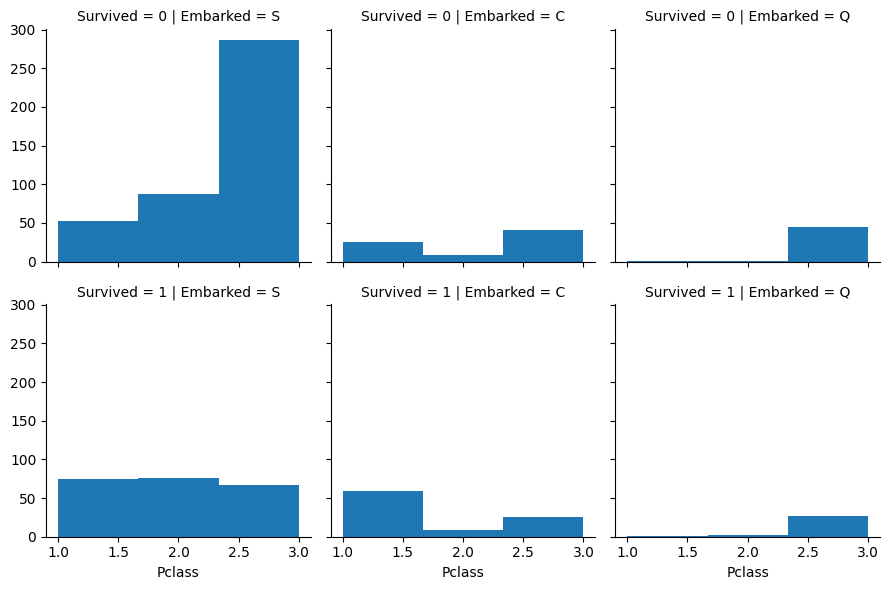

In [9]:
g=sns.FacetGrid(trdf,col="Embarked", row="Survived")
g.map(plt.hist,"Pclass",bins=3)

c:\Program Files\Python39\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Program Files\Python39\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


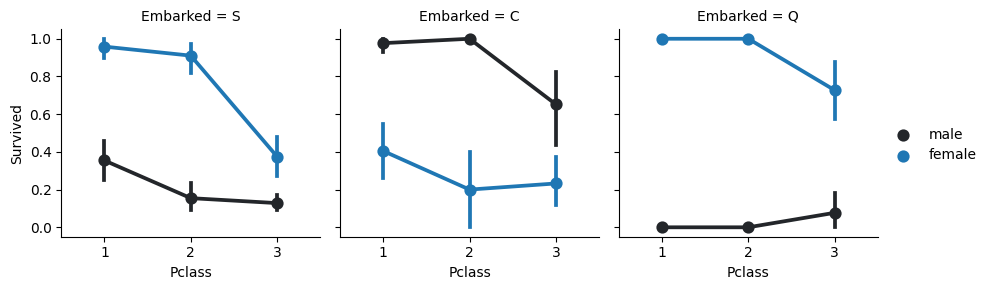

In [10]:
g=sns.FacetGrid(trdf, col="Embarked")
g.map(sns.pointplot,"Pclass","Survived","Sex")
g.add_legend()

In [11]:
trdf['Embarked'] = trdf['Embarked'].fillna('C')

In [12]:
trdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
trdf[trdf['PassengerId']==62]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C


In [14]:
trdf[trdf['Ticket']=='113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C


In [15]:
tedf[tedf['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [16]:
tedf['Fare'] = tedf['Fare'].fillna(0)
tedf[tedf['PassengerId']==1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,0.0,NaN,S


In [17]:
pd.crosstab(trdf['Pclass'],trdf['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [18]:
trdf[['Pclass','Age']].groupby(['Pclass']).mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [19]:
trdf[['Sex','Age']].groupby(['Sex']).mean()

,Age
Sex,
female,27.915709
male,30.726645


In [20]:
trdf[['Sex','Fare']].groupby(['Sex']).mean()

,Fare
Sex,
female,44.479818
male,25.523893


In [21]:
#Pclass, Fare 3*2 리스트
# 1-0or1
# [[0,0,0,],[0,0,0]]
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df=dataset[(dataset["Fare"]==i) & (dataset["Pclass"]==j+1)]["Age"].dropna()
            age_guess=guess_df.mean()
            guess_ages[i,j]=age_guess
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex==i)&(dataset.Pclass==j+1), "Age"]=guess_ages[i,j]
    dataset["Age"]=dataset["Age"].astype(int)

In [ ]:
g=sns.FacetGrid(trdf,col="Pclass", row='Sex')
g.map(plt.hist,"Fare", bins=10)

In [ ]:
trdf.sample(5)

In [ ]:
tedf.isnull().sum()

In [22]:
combine=[trdf,tedf]
for dataset in combine:
    print(dataset.isnull().sum(), '\n')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64 



In [ ]:
trdf[['SibSp','Survived']].groupby(['SibSp']).mean()

In [ ]:
trdf[['Parch','Survived']].groupby(['Parch']).mean()

In [ ]:
tedf['SibSp'].unique()

In [ ]:
tedf['Parch'].unique()

In [ ]:
tedf[tedf['Parch']==9]

In [23]:
tedf['Parch'] = tedf['Parch'].replace(9,8)
tedf['Parch'].unique()


array([0, 1, 3, 2, 4, 6, 5, 8], dtype=int64)

In [24]:
combine=[trdf,tedf]

In [25]:
for dataset in combine:
    dataset['FamilyName'] = dataset.Name.str.extract('([A-Za-z]+)\,',expand=False)
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    dataset['Deep'] = dataset.Cabin.str.extract('([A-Za-z])',expand=False)
    dataset['Position'] = dataset.Cabin.str.extract('([0-9]+)',expand=False)

In [ ]:
trdf[['Name','Cabin','FamilyName','Title','Deep','Position']]

In [26]:
trdf = trdf.drop(['PassengerId','Name','FamilyName','Cabin','Ticket'],axis=1)
tedf = tedf.drop(['Name','FamilyName','Cabin','Ticket'],axis=1)

In [ ]:
combine=[trdf,tedf]

In [47]:
for dataset in combine:
    print(dataset.isnull().sum(), '\n')

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
Deep        687
Position    691
dtype: int64 

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
Deep           327
Position       329
dtype: int64 



In [49]:
for dataset in combine:
    dataset['Position'] = dataset['Position'].fillna(0).astype(int)

In [50]:
for dataset in combine:
    dataset.loc[(dataset["Position"]>0) & (dataset["Position"]<=74),"Position"]=1
    dataset.loc[(dataset["Position"]>74) & (dataset["Position"]<=148),"Position"]=2

In [51]:
trdf['Position'].unique()

array([0, 2, 1])

In [52]:
trdf[['Position','Survived']].groupby(['Position']).describe()

Survived                                             
            count      mean       std  min  25%  50%  75%  max
Position                                                      
0           691.0  0.301013  0.459031  0.0  0.0  0.0  1.0  1.0
1           147.0  0.680272  0.467965  0.0  0.0  1.0  1.0  1.0
2            53.0  0.641509  0.484146  0.0  0.0  1.0  1.0  1.0

In [53]:
for dataset in combine:
    dataset['Position'] = dataset['Position'].replace(2,1)

In [54]:
# trdf[['Position','Survived']].groupby(['Position']).describe()
trdf[['Position','Embarked']].groupby(['Embarked']).describe()

Position                                             
            count      mean       std  min  25%  50%  75%  max
Embarked                                                      
C           170.0  0.405882  0.492513  0.0  0.0  0.0  1.0  1.0
Q            77.0  0.051948  0.223377  0.0  0.0  0.0  0.0  1.0
S           644.0  0.197205  0.398198  0.0  0.0  0.0  0.0  1.0

In [55]:
trdf[['Title','Survived']].groupby(['Title']).count()

,Survived
Title,
Capt,1
Col,2
Countess,1
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40


In [56]:
trdf[['Title','Survived']].groupby(['Title']).mean()

,Survived
Title,
Capt,0.000000
Col,0.500000
Countess,1.000000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000


In [57]:
pd.crosstab(trdf["Title"],trdf["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [58]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Don','Dr','Jonkheer','Major','Rev','Sir'],'Mr')
    dataset['Title'] = dataset['Title'].replace(['Countess','Lady','Dona'],'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Ms','Mlle','Mme'],'Miss')

In [59]:
trdf[['Title','Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.704301
Mr,0.161710
Mrs,0.795276


In [60]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map({'Master':0,'Mr':1,'Mrs':2,'Miss':3}).astype(int)
    dataset['Sex'] = dataset['Sex'].map({'male':0,'female':1}).astype(int)
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'Q':1,'C':2}).astype(int)

In [61]:
trdf.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deep,Position
0,0,3,0,22.0,1,0,7.2500,0,1,NaN,0
1,1,1,1,38.0,1,0,71.2833,2,2,C,1
2,1,3,1,26.0,0,0,7.9250,0,3,NaN,0
3,1,1,1,35.0,1,0,53.1000,0,2,C,1
4,0,3,0,35.0,0,0,8.0500,0,1,NaN,0


In [62]:
trdf[['Title','Age']].groupby(['Title']).describe()

Age                                                       
       count       mean        std    min     25%   50%   75%   max
Title                                                              
0       36.0   4.574167   3.619872   0.42   1.000   3.5   8.0  12.0
1      418.0  33.022727  12.996267  11.00  23.000  30.0  40.0  80.0
2      110.0  35.981818  11.390469  14.00  28.000  35.0  44.0  63.0
3      150.0  21.860000  12.828485   0.75  14.625  21.5  30.0  63.0

In [63]:
trdf["FareBand"]=pd.qcut(trdf["Fare"],3)
trdf[["FareBand","Survived"]].groupby(["FareBand"],
    as_index=False).mean().sort_values(by="FareBand")

,FareBand,Survived
0,"(-0.001, 8.662]",0.198052
1,"(8.662, 26.0]",0.402778
2,"(26.0, 512.329]",0.559322


In [64]:
for dataset in combine:
    dataset.loc[dataset["Fare"]<=8.662,"Fare"]=0
    dataset.loc[(dataset["Fare"]>8.662) & (dataset["Fare"]<=26.0),"Fare"]=1
    dataset.loc[dataset["Fare"]>26.0 ,"Fare"]=2

In [65]:
trdf=trdf.drop('FareBand',axis=1)

In [66]:
trdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deep,Position
0,0,3,0,22.0,1,0,0.0,0,1,NaN,0
1,1,1,1,38.0,1,0,2.0,2,2,C,1
2,1,3,1,26.0,0,0,0.0,0,3,NaN,0
3,1,1,1,35.0,1,0,2.0,0,2,C,1
4,0,3,0,35.0,0,0,0.0,0,1,NaN,0


In [67]:
trdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
 8   Title     891 non-null    int32  
 9   Deep      204 non-null    object 
 10  Position  891 non-null    int32  
dtypes: float64(2), int32(4), int64(4), object(1)
memory usage: 62.8+ KB


In [ ]:
#Pclass, Title 3*2 리스트
# 1-0or1
# [[0,0,0,],[0,0,0]]
guess_ages=np.zeros((2,3))
guess_ages

In [ ]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df=dataset[(dataset["Title"]==i) & (dataset["Pclass"]==j+1)]["Age"].dropna()
            age_guess=guess_df.mean()
            guess_ages[i,j]=age_guess
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Title==i)&(dataset.Pclass==j+1), "Age"]=guess_ages[i,j]
    dataset["Age"]=dataset["Age"]

In [ ]:
combine=[trdf,tedf]

In [ ]:
for dataset in combine:
    print(dataset.isnull().sum(), '\n')

In [ ]:
trdf["AgeBand"]=pd.cut(trdf["Age"],8)
trdf[["AgeBand","Survived"]].groupby(["AgeBand"],
    as_index=False).mean().sort_values(by="AgeBand")

In [ ]:
for dataset in combine:
    dataset.loc[dataset["Age"]<=10,"Age"]=0
    dataset.loc[(dataset["Age"]>10)&(dataset["Age"]<=20),"Age"]=1
    dataset.loc[(dataset["Age"]>20)&(dataset["Age"]<=30),"Age"]=2
    dataset.loc[(dataset["Age"]>30)&(dataset["Age"]<=40),"Age"]=3
    dataset.loc[(dataset["Age"]>40)&(dataset["Age"]<=50),"Age"]=4
    dataset.loc[(dataset["Age"]>50)&(dataset["Age"]<=60),"Age"]=5
    dataset.loc[(dataset["Age"]>60)&(dataset["Age"]<=70),"Age"]=6
    dataset.loc[(dataset["Age"]>70),"Age"]=7

In [ ]:
trdf=trdf.drop('AgeBand',axis=1)

In [ ]:
trdf.head()


In [ ]:
#Pclass, Title 3*2 리스트
# 1-0or1
# [[0,0,0,],[0,0,0]]
guess_deep=np.zeros((2,3))
guess_deep

In [ ]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df=dataset[(dataset["Fare"]==i) & (dataset["Pclass"]==j+1)]["Deep"].dropna()
            guess_deep[i,j]=guess_df
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Deep.isnull()) & (dataset.Fare==i)&(dataset.Pclass==j+1), "Deep"]=guess_deep[i,j]
    dataset["Deep"]=dataset["Deep"]

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    # dataset['Deep'] = dataset.Cabin.str.extract('([A-Za-z])',expand=False)
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] +1

In [ ]:
trdf.info()

In [ ]:
trdf = trdf.drop(['PassengerId','Name','SibSp','Parch','Cabin','Ticket'],axis=1)

In [ ]:
tedf.info()

In [ ]:
tedf = tedf.drop(['Name','SibSp','Parch','Cabin','Ticket'],axis=1)

In [ ]:
combine=[trdf,tedf]

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Don','Dr','Jonkheer','Major','Rev','Sir'],'Mr')
    dataset['Title'] = dataset['Title'].replace(['Countess','Lady','Dona'],'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Ms','Mlle','Mme'],'Miss')

In [ ]:
trdf['Embarked'] = trdf['Embarked'].fillna('S')
tedf['Fare'] = tedf['Fare'].fillna(8)

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map({'Master':0,'Mr':1,'Mrs':2,'Miss':3}).astype(int)
    dataset['Sex'] = dataset['Sex'].map({'male':0,'female':1}).astype(int)
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'Q':1,'C':2}).astype(int)

## 여기까지 일반 셋팅

In [ ]:
for dataset in combine:
    print(dataset.isna().sum())


In [ ]:
g=sns.FacetGrid(trdf,row='Sex',col='Pclass')
g.map(plt.hist,'Age')

In [ ]:
trdf[(trdf['Pclass']==3) & (trdf['Sex']==0)].Age.mean()

In [ ]:
trdf[(trdf['Age'].isnull())&(trdf['Pclass']==2)]

In [ ]:
#Pclass, Gender 3*2 리스트
# 1-0or1
# [[0,0,0,],[0,0,0]]
guess_ages=np.zeros((2,3))
guess_ages

In [ ]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df=dataset[(dataset["Sex"]==i) & (dataset["Pclass"]==j+1)]["Age"].dropna()
            age_guess=guess_df.mean()
            guess_ages[i,j]=age_guess
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex==i)&(dataset.Pclass==j+1),\
                "Age"]=guess_ages[i,j]
    dataset["Age"]=dataset["Age"].astype(int)

In [ ]:
trdf['AgeBand']=pd.cut(trdf['Age'],10)
trdf[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand')

In [ ]:
combine=[trdf,tedf]

In [ ]:
for dataset in combine:
    dataset.loc[dataset["Age"]<=8,"Age"]=0
    dataset.loc[(dataset["Age"]>8)&(dataset["Age"]<=16),"Age"]=1
    dataset.loc[(dataset["Age"]>16)&(dataset["Age"]<=24),"Age"]=2
    dataset.loc[(dataset["Age"]>24)&(dataset["Age"]<=32),"Age"]=3
    dataset.loc[(dataset["Age"]>32)&(dataset["Age"]<=40),"Age"]=4
    dataset.loc[(dataset["Age"]>40)&(dataset["Age"]<=48),"Age"]=5
    dataset.loc[(dataset["Age"]>48)&(dataset["Age"]<=56),"Age"]=6
    dataset.loc[(dataset["Age"]>56)&(dataset["Age"]<=64),"Age"]=7
    dataset.loc[(dataset["Age"]>64)&(dataset["Age"]<=72),"Age"]=8
    dataset.loc[(dataset["Age"]>72)&(dataset["Age"]<=80),"Age"]=9
    dataset.loc[(dataset["Age"]>80),"Age"]=10
    
trdf.head()

In [ ]:
trdf=trdf.drop(['AgeBand'],axis=1)

In [ ]:
trdf.head()

In [ ]:
tedf.head()

In [ ]:
trdf['FareBand']=pd.qcut(trdf['Fare'],4)
trdf[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand')


In [ ]:
for dataset in combine:
    dataset.loc[dataset["Fare"]<=7.91,"Fare"]=0
    dataset.loc[(dataset["Fare"]>7.91) & (dataset["Fare"]<=14.454),"Fare"]=1
    dataset.loc[(dataset["Fare"]>14.454) & (dataset["Fare"]<=31.0),"Fare"]=2
    dataset.loc[(dataset["Fare"]>31.0) & (dataset["Fare"]<=512.329),"Fare"]=3


In [ ]:
trdf.head()

In [ ]:
trdf=trdf.drop(["FareBand"],axis=1)
combine=[trdf,tedf]

In [ ]:
tedf.head()

In [ ]:
X_trdf=trdf.drop('Survived',axis=1)
Y_trdf=trdf['Survived']
X_tedf=tedf.drop('PassengerId', axis=1).copy()
X_trdf.shape, Y_trdf.shape, X_tedf.shape

## 로지스틱 레그레이션
## 렐루, 시그모이드

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_trdf,Y_trdf)
Y_pred=logreg.predict(X_tedf)
acc_log=round(logreg.score(X_trdf,Y_trdf)*100,2)
acc_log

### 서포트 벡터 머신

- 분류 알고리즘
- 이진데이터 분류시 최적 성능

In [ ]:
from sklearn.svm import SVC, LinearSVC
svc=SVC()
svc.fit(X_trdf,Y_trdf)
Y_pred=svc.predict(X_tedf)
acc_svc=round(svc.score(X_trdf,Y_trdf)*100,2)
acc_svc

### k-NN 분류와 회귀

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_trdf,Y_trdf)
Y_pred=knn.predict(X_tedf)
acc_knn=round(knn.score(X_trdf,Y_trdf)*100,2)
acc_knn

## 나이브 베이지안

In [ ]:
from sklearn.naive_bayes import GaussianNB 
gaussian=GaussianNB()
gaussian.fit(X_trdf,Y_trdf)
Y_pred=gaussian.predict(X_tedf)
acc_gaussian=round(gaussian.score(X_trdf,Y_trdf)*100,2)
acc_gaussian

## 퍼셉트론

In [ ]:
from sklearn.linear_model import Perceptron
perceptron=Perceptron()
perceptron.fit(X_trdf,Y_trdf)
Y_pred=perceptron.predict(X_tedf)
acc_perceptron=round(perceptron.score(X_trdf,Y_trdf)*100,2)
acc_perceptron

## LinearSVC

In [ ]:
linear_svc=LinearSVC()
linear_svc.fit(X_trdf,Y_trdf)
Y_pred=linear_svc.predict(X_tedf)
acc_linear_svc=round(linear_svc.score(X_trdf,Y_trdf)*100,2)
acc_linear_svc

## 확률적 경사 하강법(Stochastic Gradient Descent)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_trdf,Y_trdf)
Y_pred=sgd.predict(X_tedf)
acc_sgd=round(sgd.score(X_trdf,Y_trdf)*100,2)
acc_sgd

## 결정트리(Decision Tree)

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_trdf,Y_trdf)
Y_pred=decision_tree.predict(X_tedf)
acc_decision_tree=round(decision_tree.score(X_trdf,Y_trdf)*100,2)
acc_decision_tree

## 랜덤 포레스트(Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_trdf,Y_trdf)
Y_pred=random_forest.predict(X_tedf)
acc_random_forest=round(random_forest.score(X_trdf,Y_trdf)*100,2)
acc_random_forest

## 모델 평가 순위

In [ ]:
models=pd.DataFrame({
    'Model':['SVM',
             'KNN',
             'Logistic Regression',
             'Random Forest',
             'Naive Bayes',
             'Perceptron',
             'SGD',
             'L-SVC',
             'Decision Tree'],
    'Score':[
        acc_svc,
        acc_knn,
        acc_log,
        acc_random_forest,
        acc_gaussian,
        acc_perceptron,
        acc_sgd,
        acc_linear_svc,
        acc_decision_tree
    ]
})
models.sort_values(by='Score', ascending=False)

In [ ]:
submission=pd.DataFrame({
    'PassengerId':tedf['PassengerId'],
    'Survived':Y_pred
})

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission.csv',index=False)